In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
model_path="/content/drive/MyDrive/Colab Notebooks/ML_LAB/Emotion recognition/trained_model.h5" # trained model

pic_path="/content/drive/MyDrive/Colab Notebooks/ML_LAB/Emotion recognition/happyFace2.jpeg"


In [ ]:
new_model=tf.keras.models.load_model(model_path)

In [ ]:
pic=cv2.imread(pic_path)

In [ ]:
pic.shape

(675, 1200, 3)

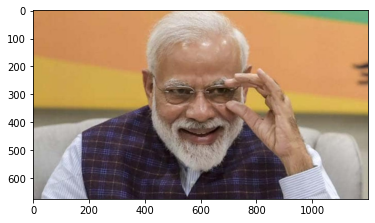

In [ ]:
plt.imshow(cv2.cvtColor(pic,cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [ ]:
gray=cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
gray.shape

(675, 1200)

In [ ]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
print(type(faces))

<class 'numpy.ndarray'>


In [ ]:
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = pic[y:y+h, x:x+w]
    cv2.rectangle(pic, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
      print("Face not detected")
    else:
      for (ex,ey,ew,eh) in facess:
        face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face


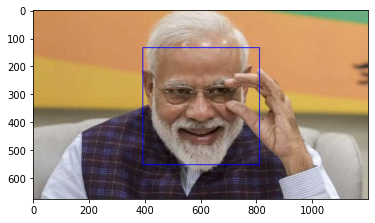

In [ ]:
plt.imshow(cv2.cvtColor(pic,cv2.COLOR_BGR2RGB))

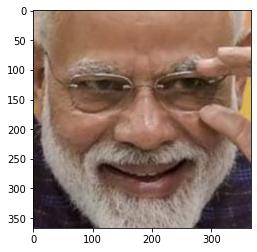

In [ ]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))


In [ ]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
final_image = final_image/255.0

In [ ]:
Predictions = new_model.predict(final_image)

In [ ]:
Predictions[0]

array([2.16876404e-04, 5.27161335e-11, 1.67982325e-05, 9.99763548e-01,
       1.48567483e-06, 1.18419685e-07, 1.21756909e-06], dtype=float32)

In [ ]:
emotion = np.argmax(Predictions)
emotions=['Angry','Disgust','Fear','Happy','Neutral','Sed','Surprise']
print(emotions[emotion])

Happy


In [ ]:
pic_path="/content/drive/MyDrive/Colab Notebooks/ML_LAB/Emotion recognition/angryFace.jpg"

In [ ]:
pic=cv2.imread(pic_path)

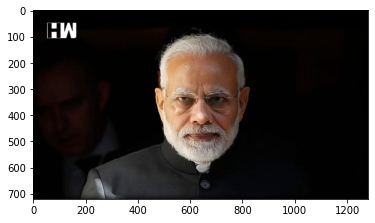

In [ ]:
plt.imshow(cv2.cvtColor(pic,cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [ ]:
gray=cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
gray.shape

(720, 1280)

In [ ]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
print(type(faces))

<class 'numpy.ndarray'>


In [ ]:
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = pic[y:y+h, x:x+w]
    cv2.rectangle(pic, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
      print("Face not detected")
    else:
      for (ex,ey,ew,eh) in facess:
        face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face


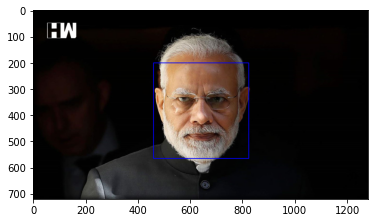

In [ ]:
plt.imshow(cv2.cvtColor(pic,cv2.COLOR_BGR2RGB))

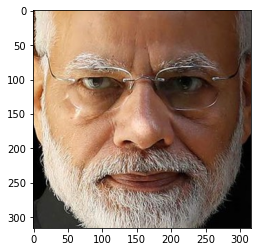

In [ ]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))


In [ ]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
final_image = final_image/255.0

In [ ]:
Predictions = new_model.predict(final_image)

In [ ]:
Predictions[0]

array([9.1792029e-01, 2.0242660e-05, 7.9125538e-02, 1.9375802e-03,
       1.9530095e-04, 2.4644480e-04, 5.5462064e-04], dtype=float32)

In [ ]:
emotion = np.argmax(Predictions)
emotions=['Angry','Disgust','Fear','Happy','Neutral','Sed','Surprise']
print(emotions[emotion])

Angry
